# 課題0710

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")
plt.rcParams['font.family'] = 'sans-serif'

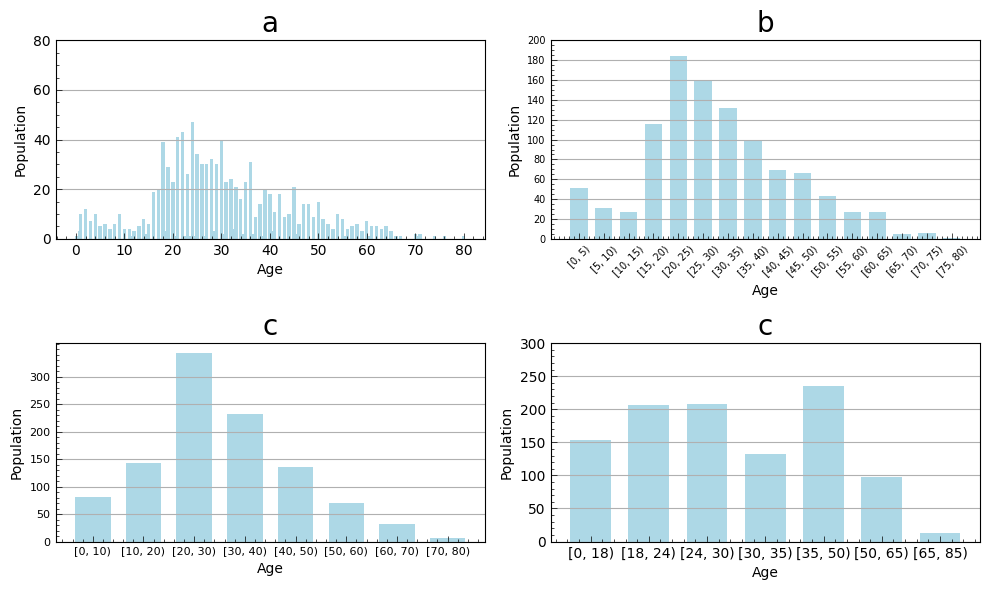

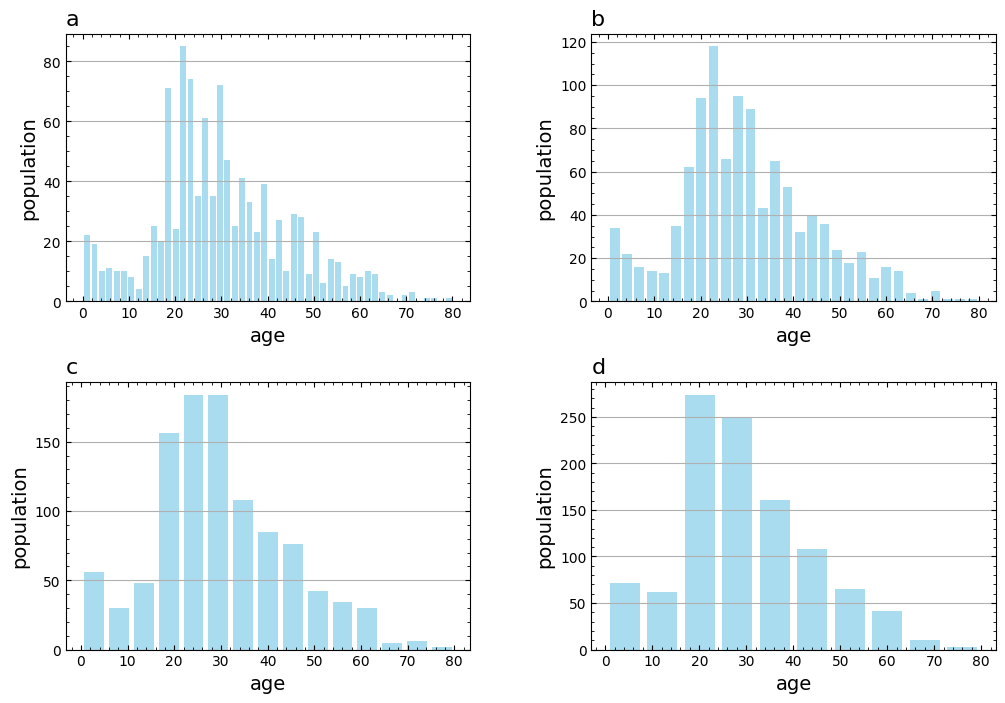

In [37]:
# I am trying to draw the graph by plt.bar(), but is seems that it does not work.

data = df['age'].value_counts()
x = data.index
y = data.values
plt.figure(figsize=(10,6))
# subplot(221)
plt.subplot(221)
plt.bar(x,y,color='lightblue',width = 0.7)
plt.minorticks_on()
plt.title('a',fontsize=20)
plt.xlabel('Age',fontsize = 10)
plt.ylabel('Population',fontsize = 10)
# for a,b in zip(x,y):
    # plt.text(a,b,b,ha='center',va='bottom', fontsize=5)
plt.tick_params(axis='both',which = 'major', direction='in', length = 4, width = 0.5, labelsize = 10) 
plt.tick_params(axis='both',which = 'minor', direction='in', length = 2, width = 0.5)
plt.yticks(range(0,100,20))
# plt.xticks(rotation=45)
plt.grid(axis = 'y')

#subplot(222)
df['age2']=pd.cut(df['age'],bins=range(0,85,5),right=False)
data2 = df['age2'].value_counts().sort_index()
plt.subplot(222)
plt.bar(data2.index.astype(str),data2.values,color='lightblue',width = 0.7)
plt.minorticks_on()
plt.title('b',fontsize=20)
plt.xlabel('Age',fontsize = 10)
plt.ylabel('Population',fontsize = 10)
# for a,b in zip(x,y):
    # plt.text(a,b,b,ha='center',va='bottom', fontsize=5)
plt.tick_params(axis='both',which = 'major', direction='in', length = 4, width = 0.5, labelsize = 7) 
plt.tick_params(axis='both',which = 'minor', direction='in', length = 2, width = 0.5)
plt.yticks(range(0,220,20))
plt.xticks(rotation=45)
plt.grid(axis = 'y')

plt.subplot(223)
df['age3']=pd.cut(df['age'],bins=range(0,90,10),right=False)
data3 = df['age3'].value_counts().sort_index()
plt.bar(data3.index.astype(str),data3.values,color='lightblue',width = 0.7)
plt.minorticks_on()
plt.title('c',fontsize=20)
plt.xlabel('Age',fontsize = 10)
plt.ylabel('Population',fontsize = 10)
# for a,b in zip(x,y):
    # plt.text(a,b,b,ha='center',va='bottom', fontsize=5)
plt.tick_params(axis='both',which = 'major', direction='in', length = 4, width = 0.5, labelsize = 8) 
plt.tick_params(axis='both',which = 'minor', direction='in', length = 2, width = 0.5)
plt.yticks(range(0,301,50))
# plt.xticks(rotation=45)
plt.grid(axis = 'y')

plt.subplot(224)
df['age4']=pd.cut(df['age'],bins=[0,18,24,30,35,50,65,85],right=False)
data4 = df['age4'].value_counts().sort_index()
plt.bar(data4.index.astype(str),data4.values,color='lightblue',width = 0.7)
plt.minorticks_on()
plt.title('c',fontsize=20)
plt.xlabel('Age',fontsize = 10)
plt.ylabel('Population',fontsize = 10)
# for a,b in zip(x,y):
    # plt.text(a,b,b,ha='center',va='bottom', fontsize=5)
plt.tick_params(axis='both',which = 'major', direction='in', length = 4, width = 0.5, labelsize = 10) 
plt.tick_params(axis='both',which = 'minor', direction='in', length = 2, width = 0.5)
plt.yticks(range(0,301,50))
# plt.xticks(rotation=45)
plt.grid(axis = 'y')


plt.tight_layout()
plt.show()

# The part above is done by using pd.cut function, which is a little bit different the homework assigned. So I try to use another method.
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

parameters = [(50, 'a', range(0, 81, 20)), 
              (30, 'b', range(0, 121, 20)), 
              (15, 'c', range(0, 151, 50)), 
              (10, 'd', range(0, 251, 50))]

for i, (bins, title, yticks) in enumerate(parameters):
    row = i // 2  
    col = i % 2   

    ax = axs[row, col]
    ax.hist(df['age'], bins=bins, rwidth=0.8, color='skyblue', alpha=0.7)
    ax.set_xlabel('age', fontsize=14)
    ax.set_ylabel('population', fontsize=14)
    ax.set_title(title, fontsize=16, loc='left')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.grid(axis='y')
    ax.set_yticks(yticks)
    ax.minorticks_on()
    ax.tick_params(direction='in', which='both')

fig.subplots_adjust(wspace=0.3, hspace=0.3)





## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

![](./Figure1.png)

In [38]:
female_ages = df.loc[df['sex'] == 'female', 'age']
dataf = female_ages.value_counts()
male_ages = df.loc[df['sex']=='male','age']
datam = male_ages.value_counts()
total_ages = df.loc[:, 'age']
datat = total_ages.value_counts()

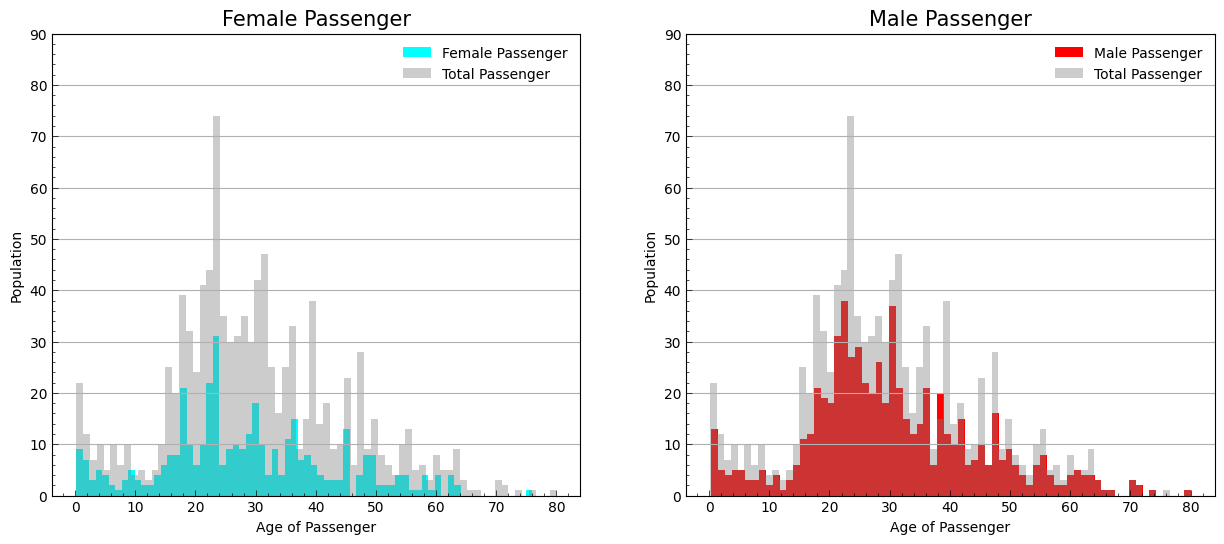

In [39]:
# FIRST FEMALE AND THEN MALE

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(dataf.index,weights = dataf.values,bins=70, color = 'cyan',label='Female Passenger')
plt.hist(datat.index,weights = datat.values,bins=70, color='gray',alpha = 0.4,label='Total Passenger')
plt.title('Female Passenger',fontsize=15)
plt.xlabel('Age of Passenger',fontsize = 10)
plt.ylabel('Population',fontsize = 10)
# for a,b in zip(x,y):
    # plt.text(a,b,b,ha='center',va='bottom', fontsize=5)
plt.tick_params(axis='both',which = 'major', direction='in', length = 4, width = 0.5, labelsize = 10) 
plt.minorticks_on()
plt.yticks(range(0,100,10))
plt.tick_params(axis='both',which = 'minor', direction='in', length = 2, width = 0.5)
# plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.legend(frameon=False)

plt.subplot(122)
plt.hist(datam.index,weights = datam.values,bins=70, color='r', label = 'Male Passenger')
plt.hist(datat.index,weights = datat.values,bins=70, color='gray',alpha = 0.4,label='Total Passenger')
plt.title('Male Passenger',fontsize=15)
plt.xlabel('Age of Passenger',fontsize = 10)
plt.ylabel('Population',fontsize = 10)
# for a,b in zip(x,y):
    # plt.text(a,b,b,ha='center',va='bottom', fontsize=5)
plt.tick_params(axis='both',which = 'major', direction='in', length = 4, width = 0.5, labelsize = 10) 
plt.minorticks_on()
plt.yticks(range(0,100,10))
plt.tick_params(axis='both',which = 'minor', direction='in', length = 2, width = 0.5)
# plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.legend(frameon=False)

plt.show()

# The graph is generally the same as the pictures shown for 'bins' parameter is not provided.

## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

![](./Figure2.png)